# Breast Cancer Wisconsin (Diagnostic) Data Set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a)  radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [2]:
import sys
sys.path.append('../')

from utils import make_dist_plot, make_roc_curve

In [16]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [4]:
dataset = pd.read_csv("data/data.csv")

In [5]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df = dataset.drop(['id', 'Unnamed: 32'], axis =1)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Explorando gráficos

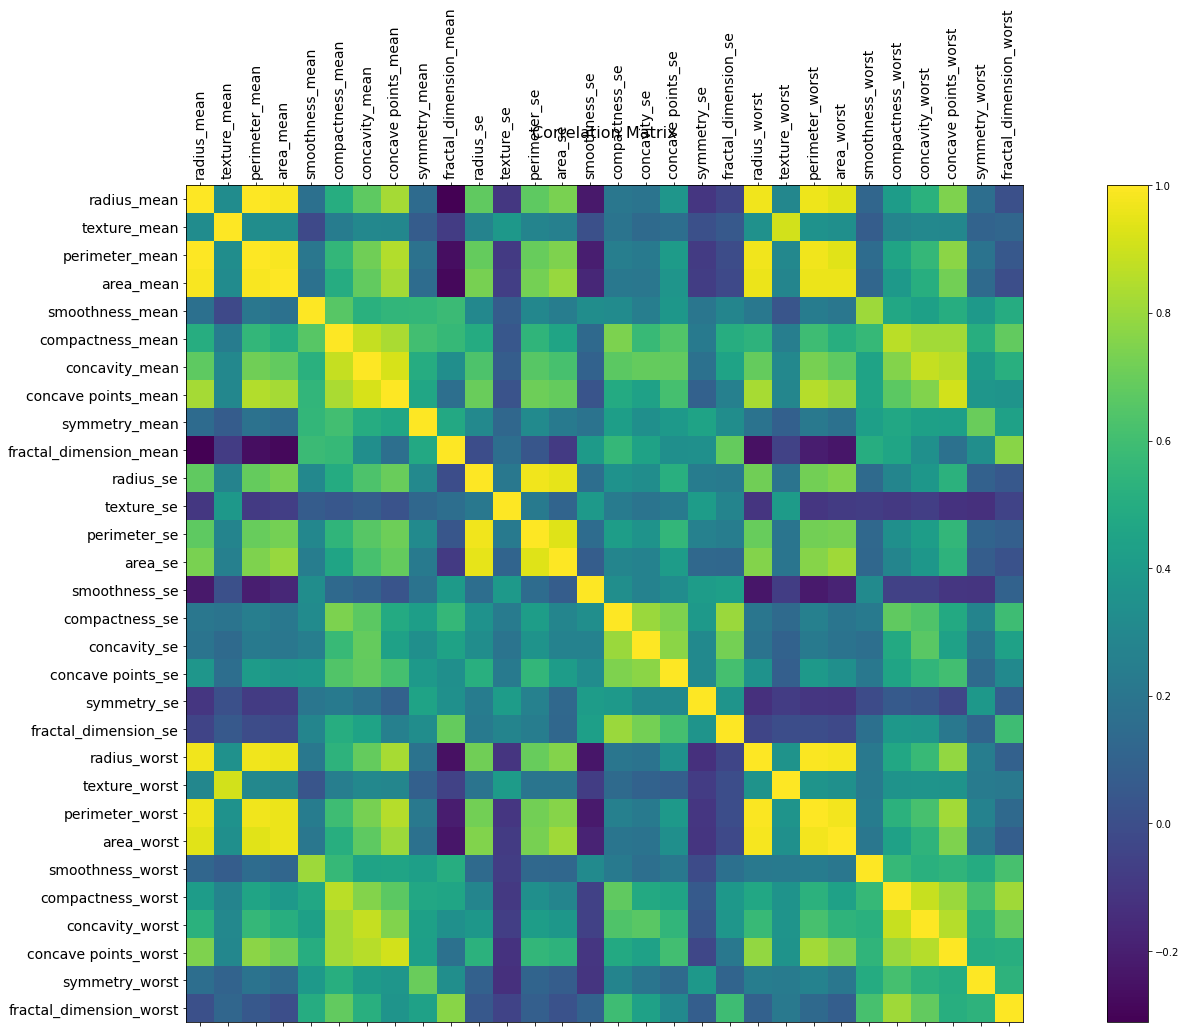

In [27]:
plt.figure(figsize=(30, 15))
df_continuos = df.select_dtypes(exclude = 'object')
plt.matshow(df_continuos.corr(), fignum=f.number)
plt.xticks(range(df_continuos.select_dtypes(['number']).shape[1]), df_continuos.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_continuos.select_dtypes(['number']).shape[1]), df_continuos.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

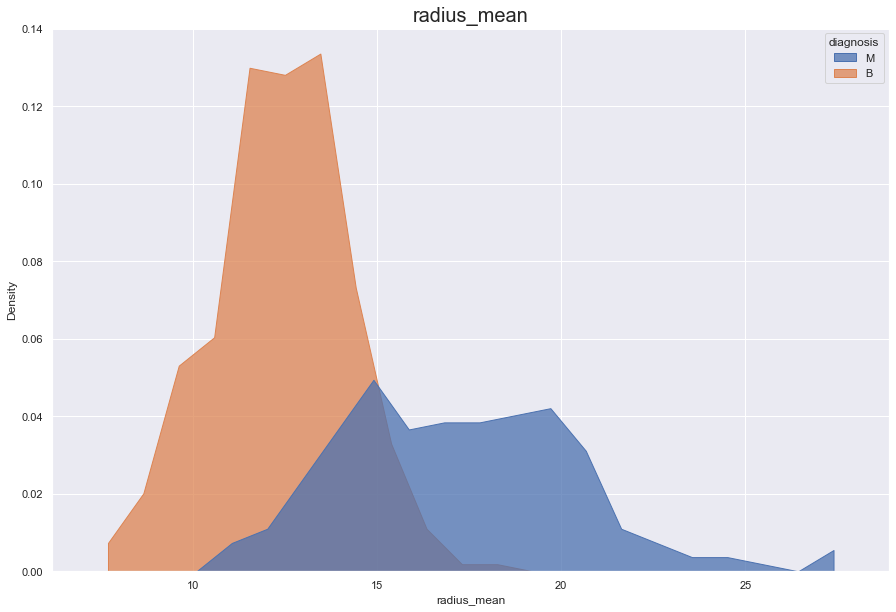

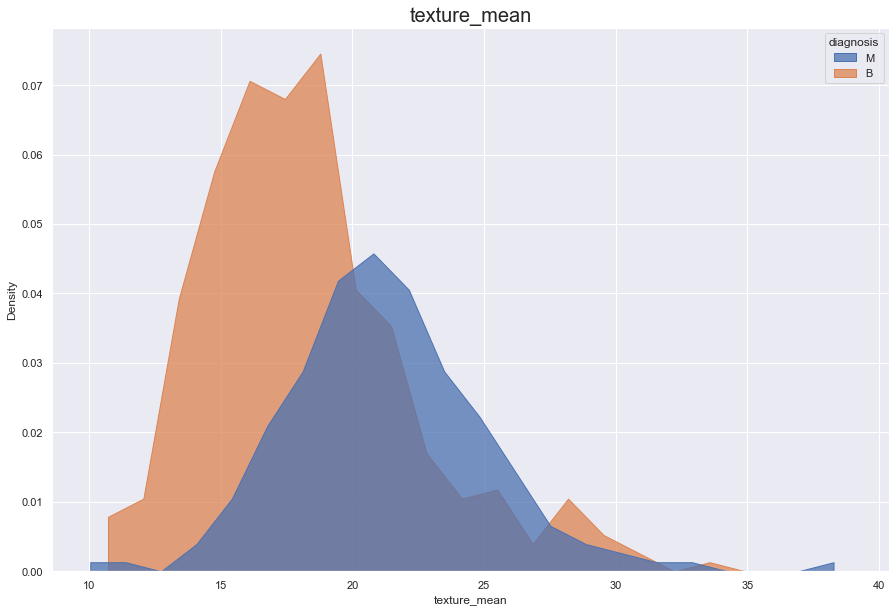

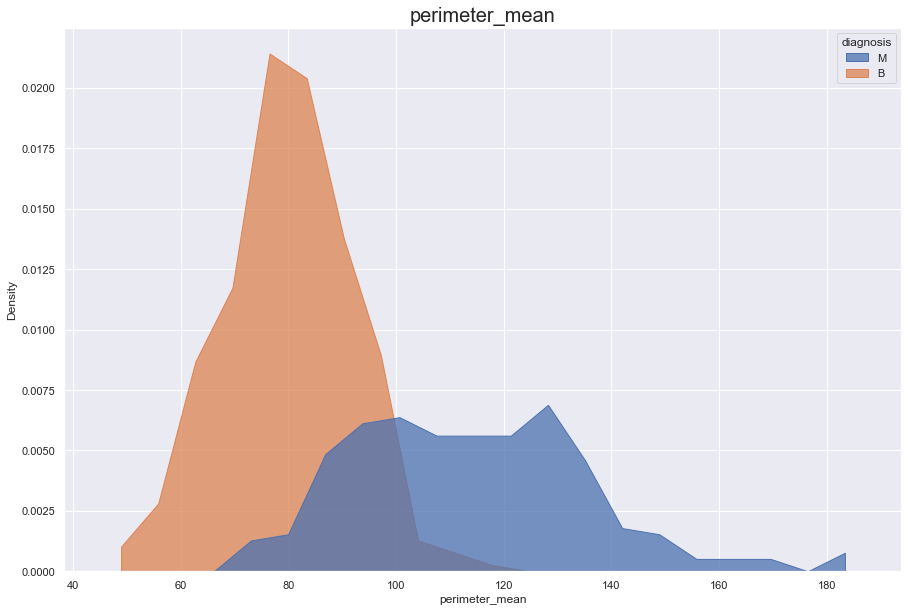

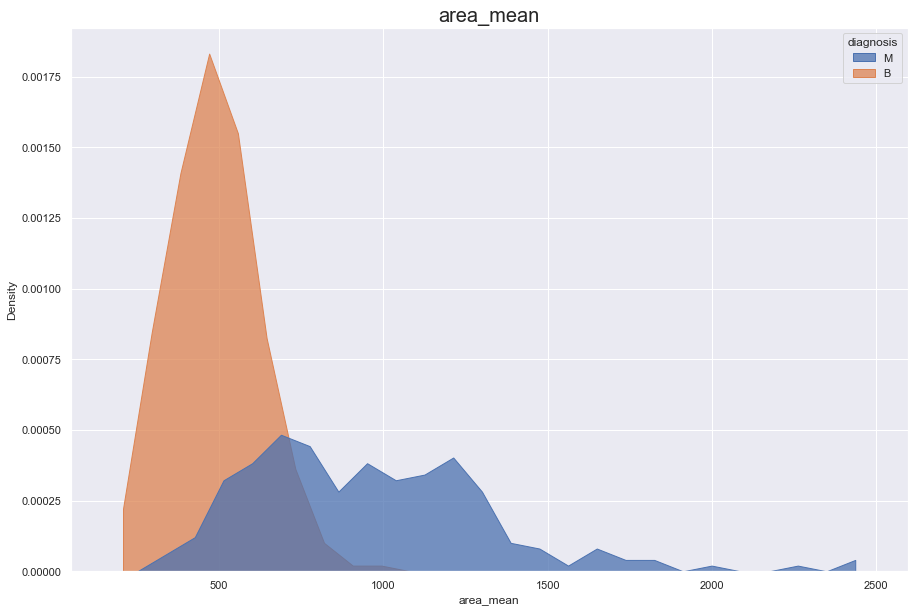

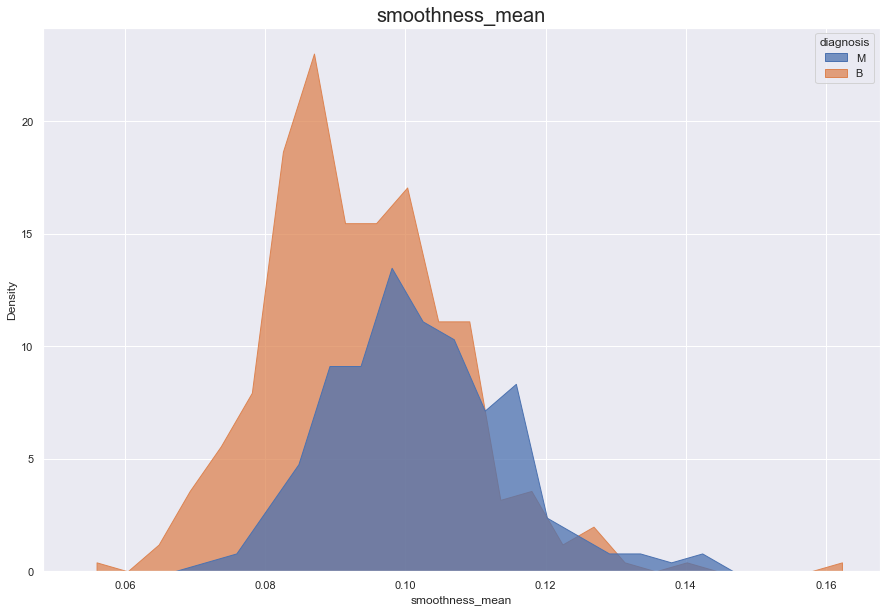

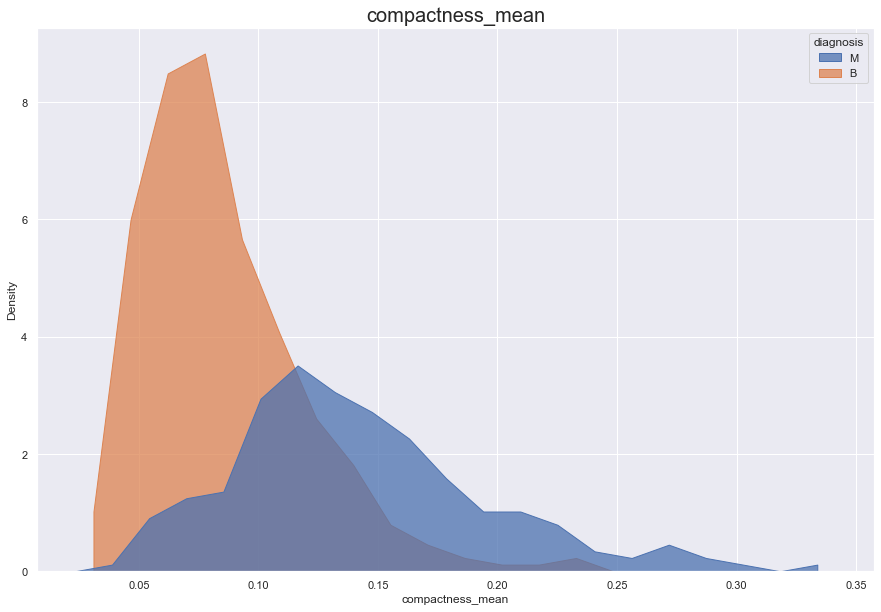

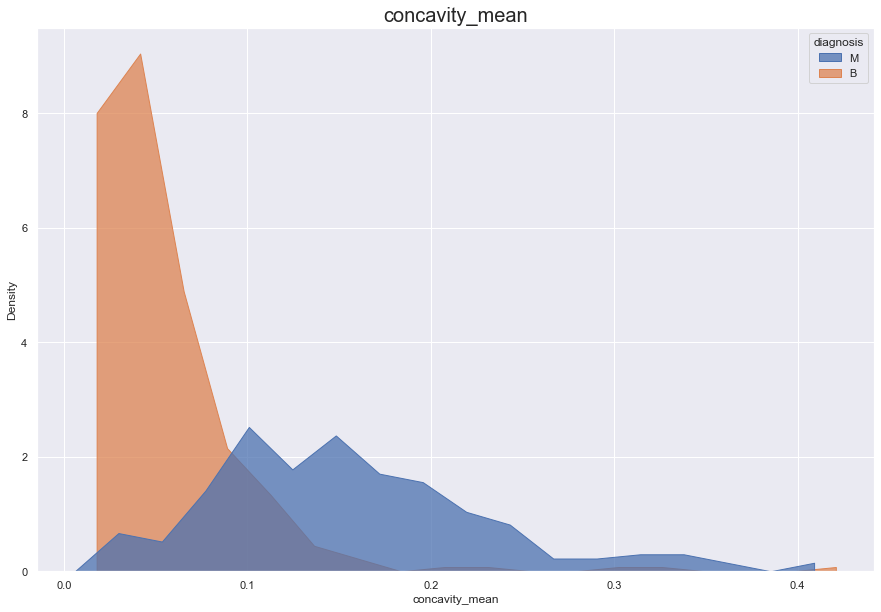

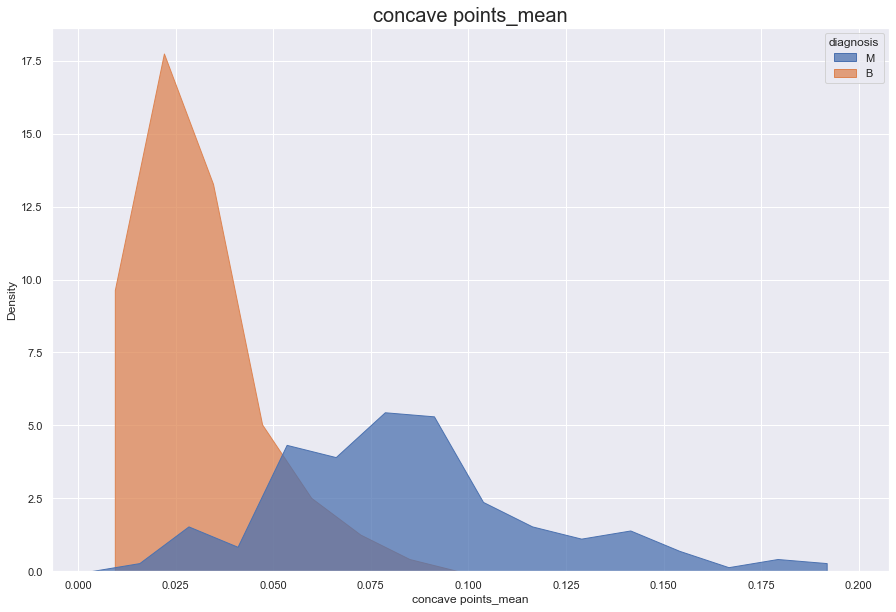

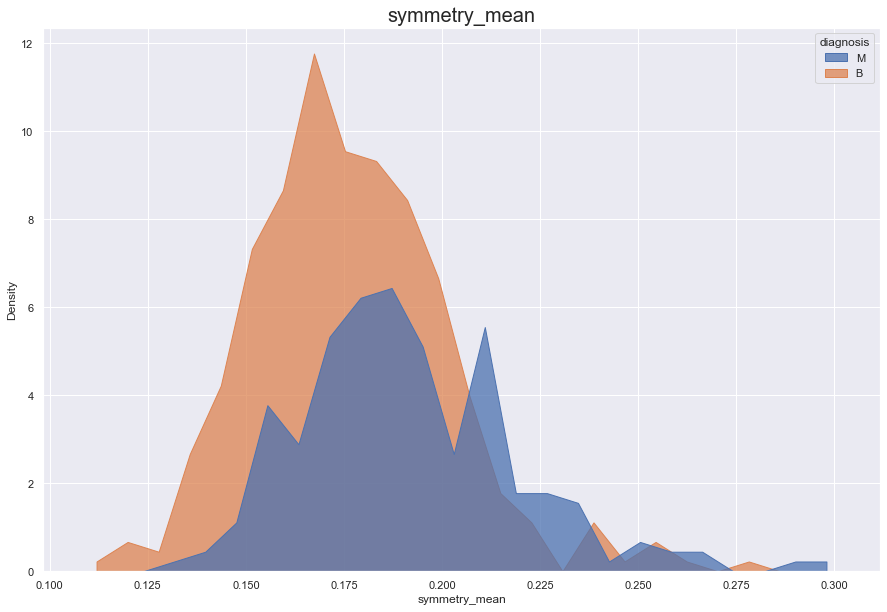

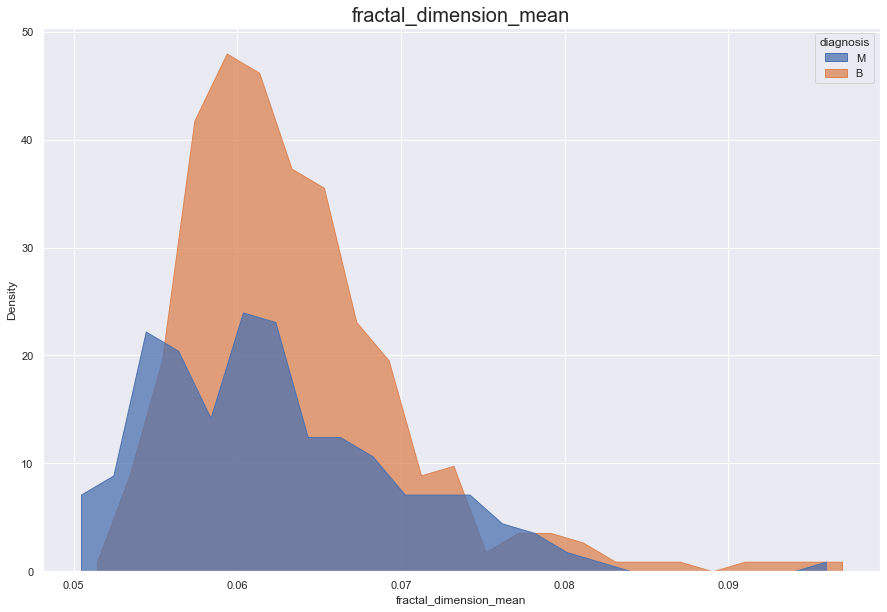

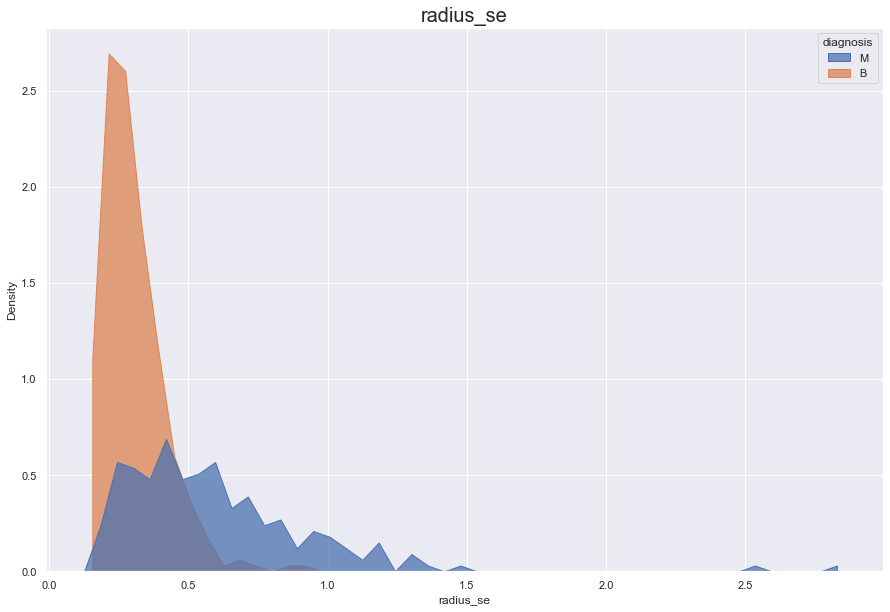

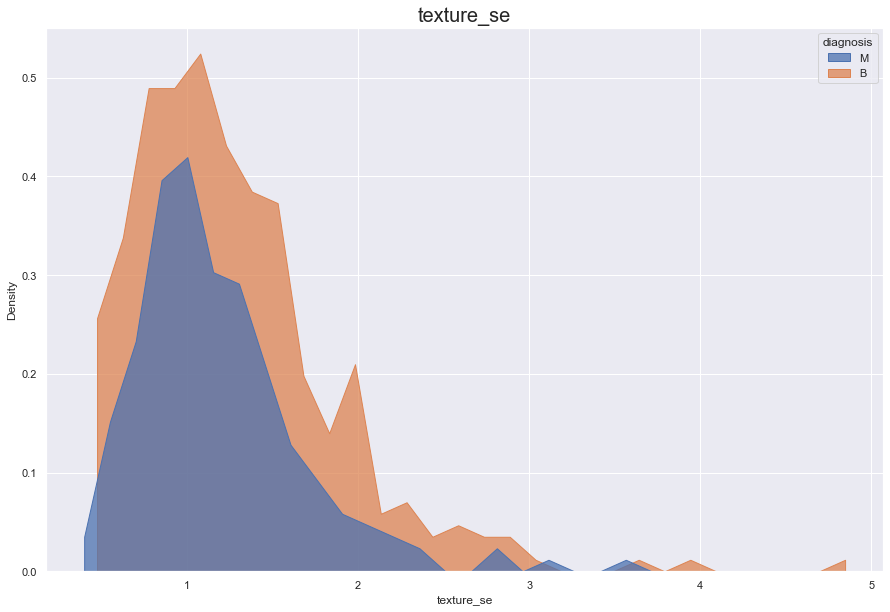

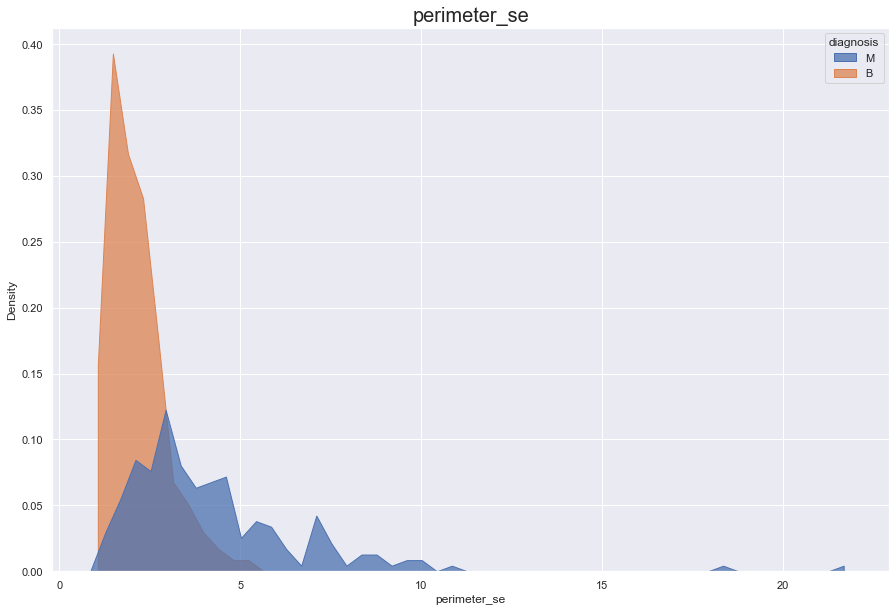

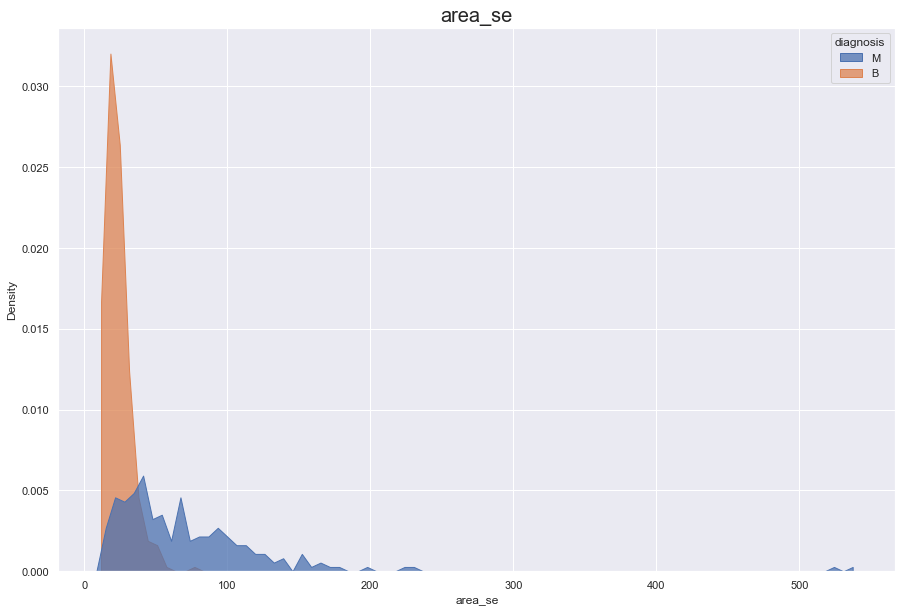

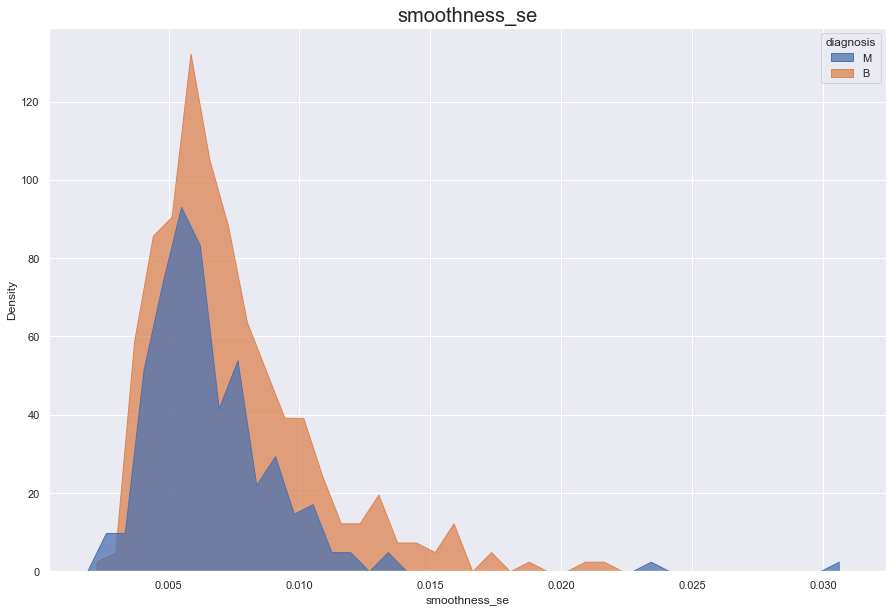

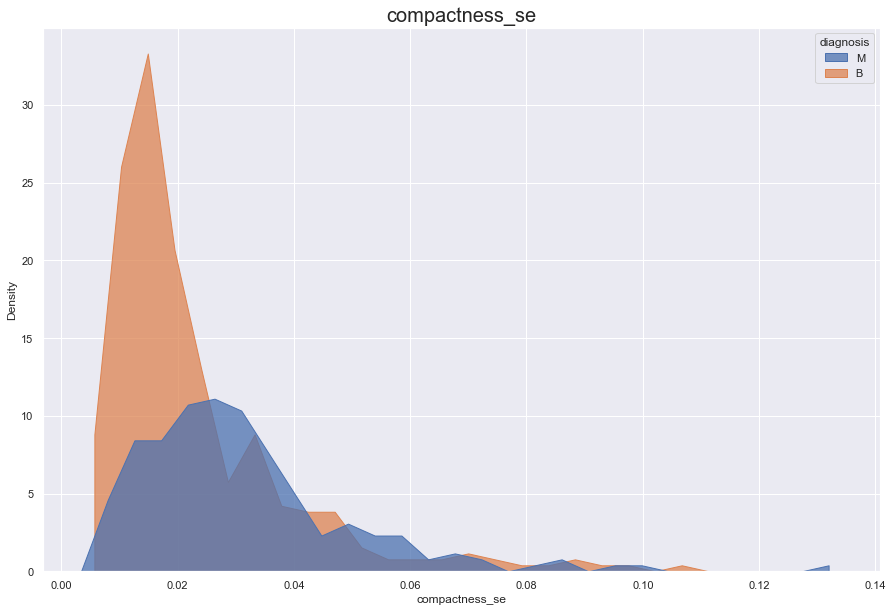

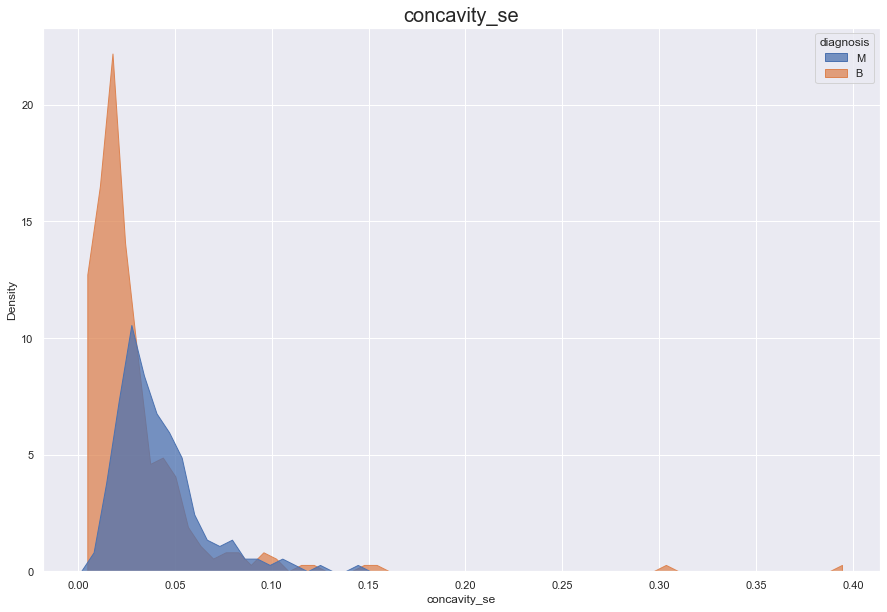

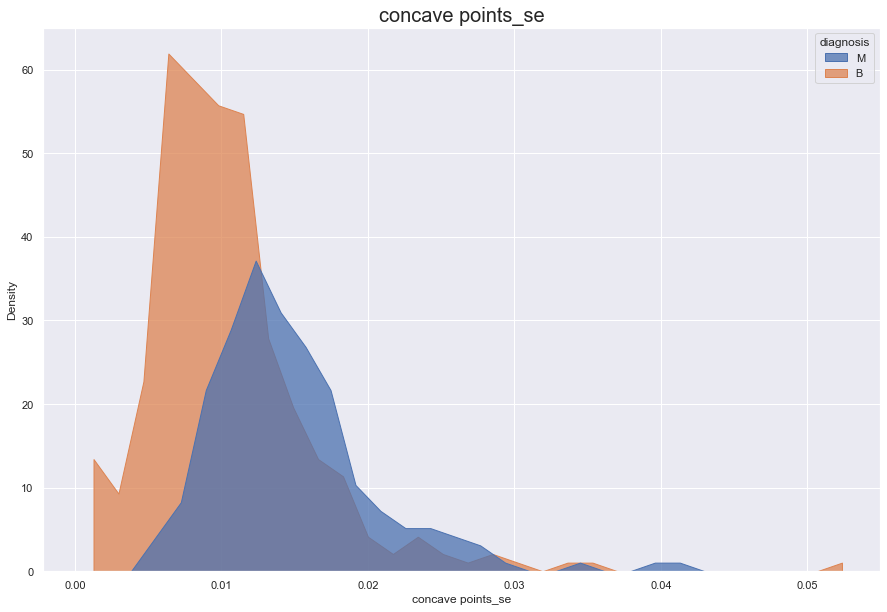

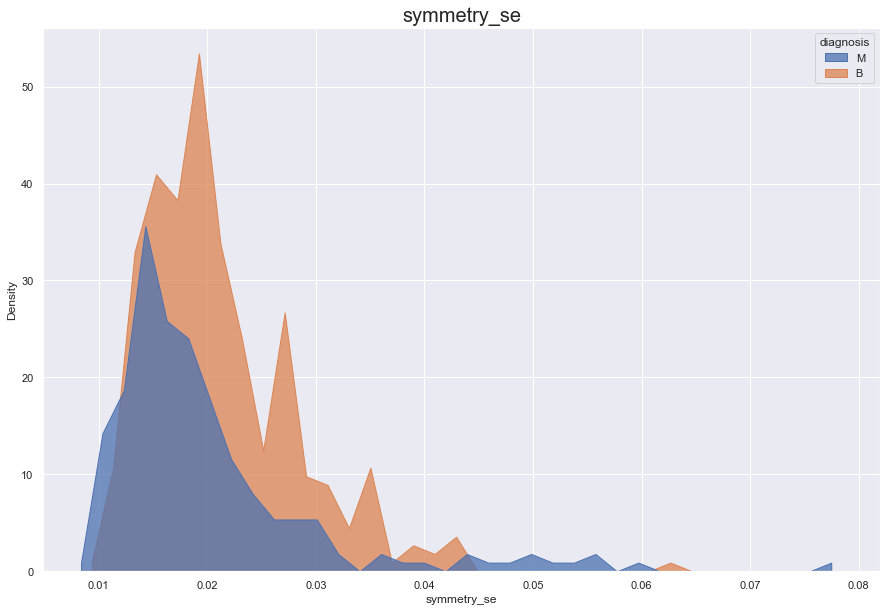

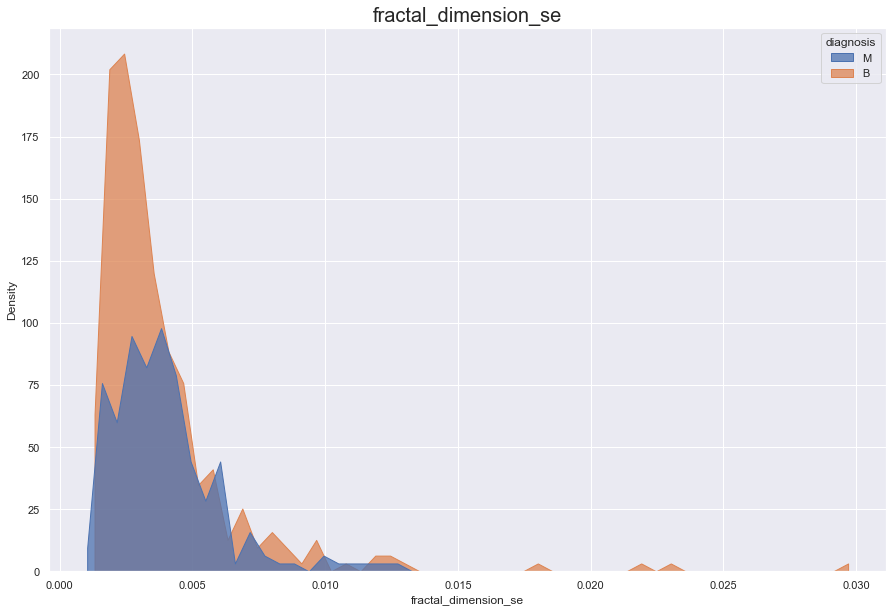

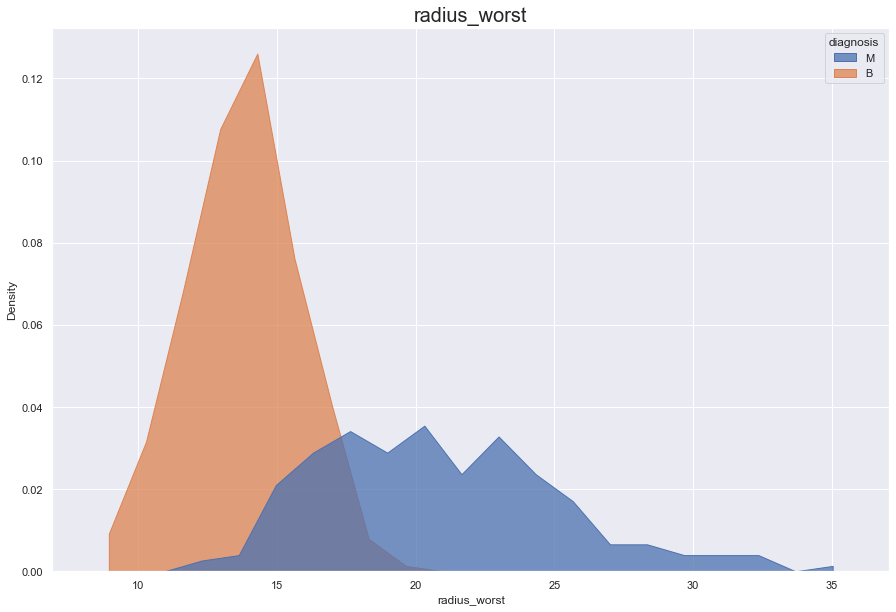

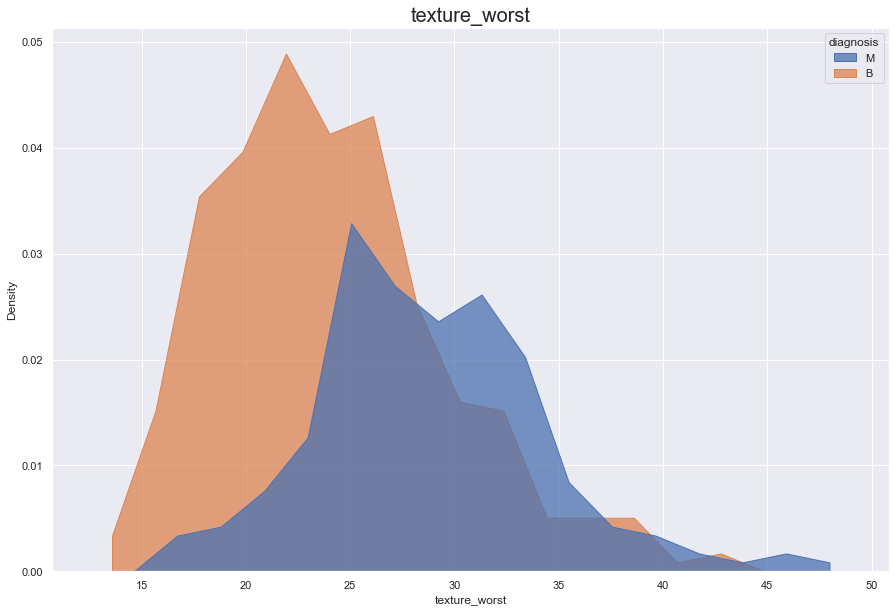

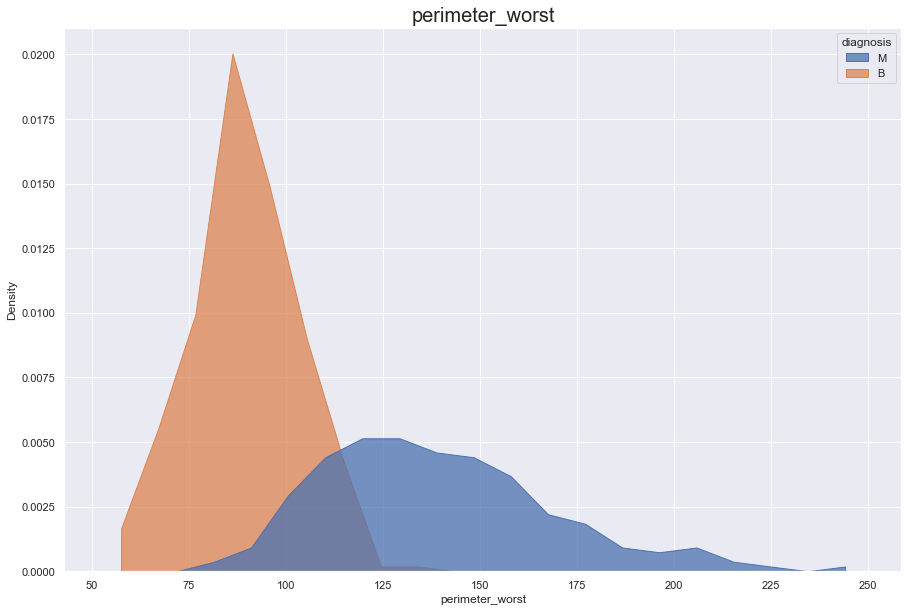

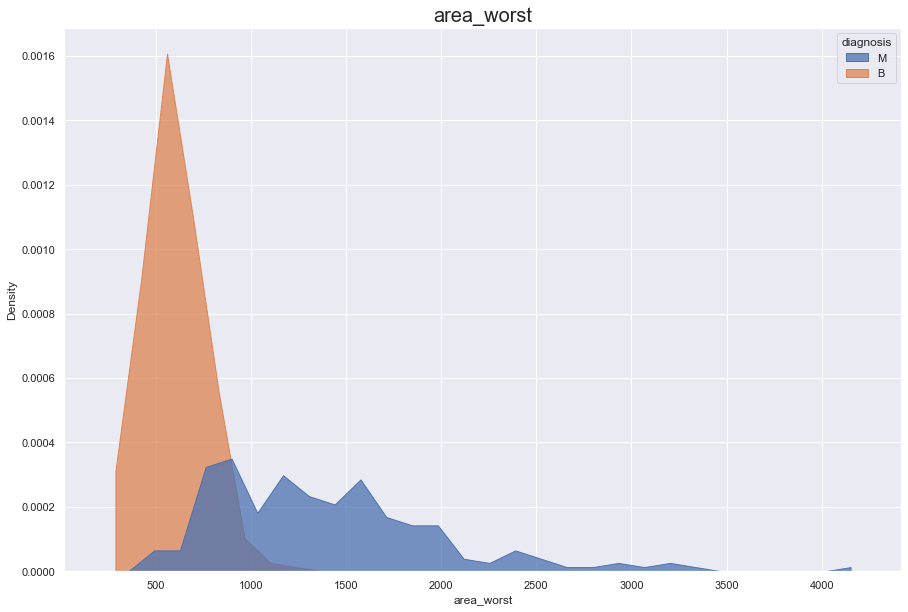

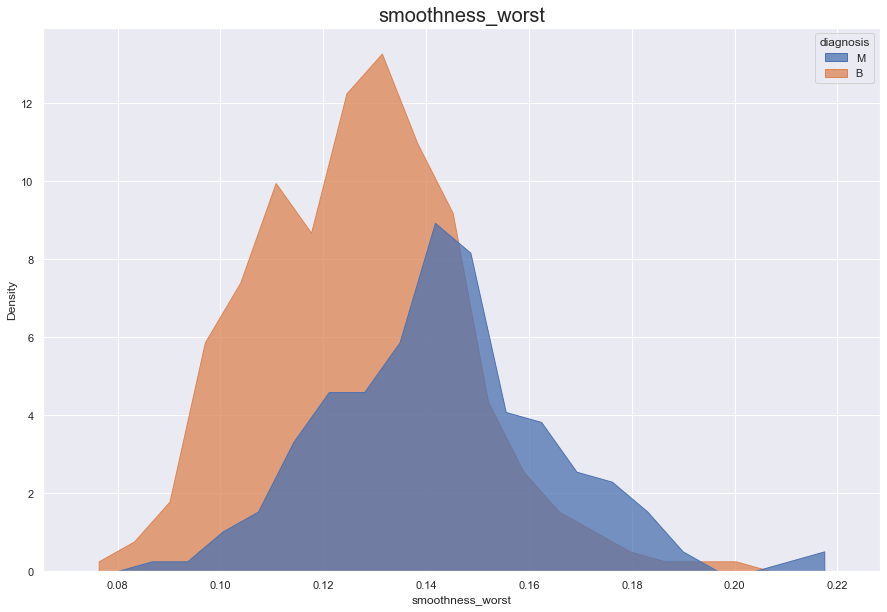

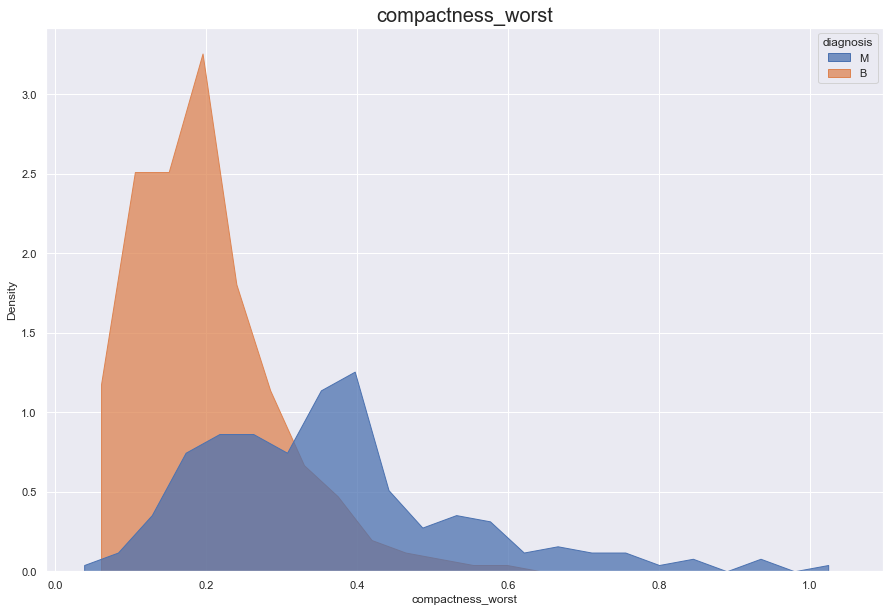

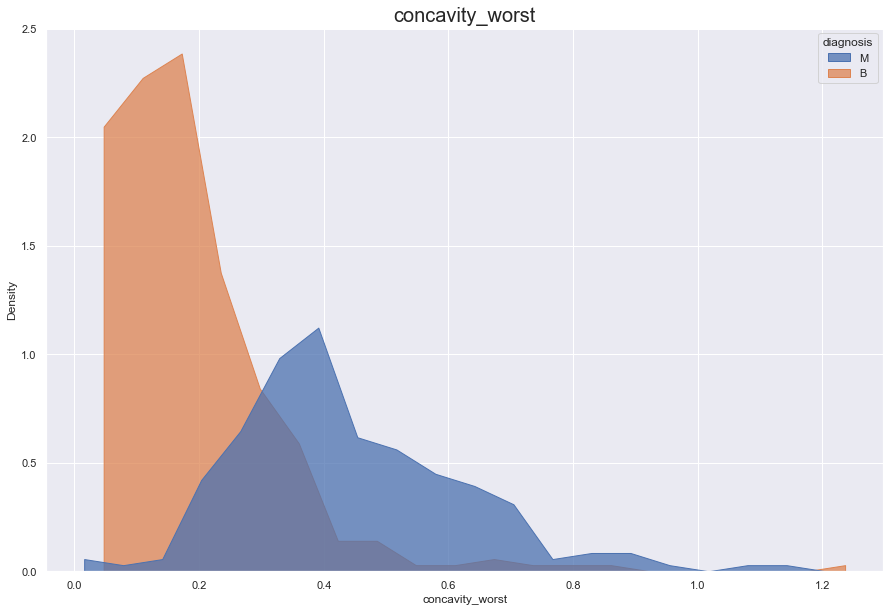

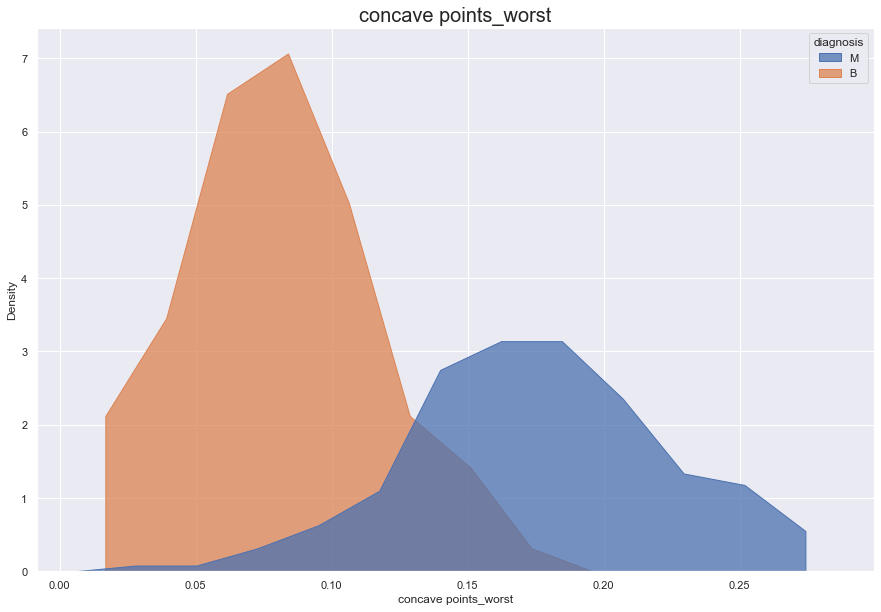

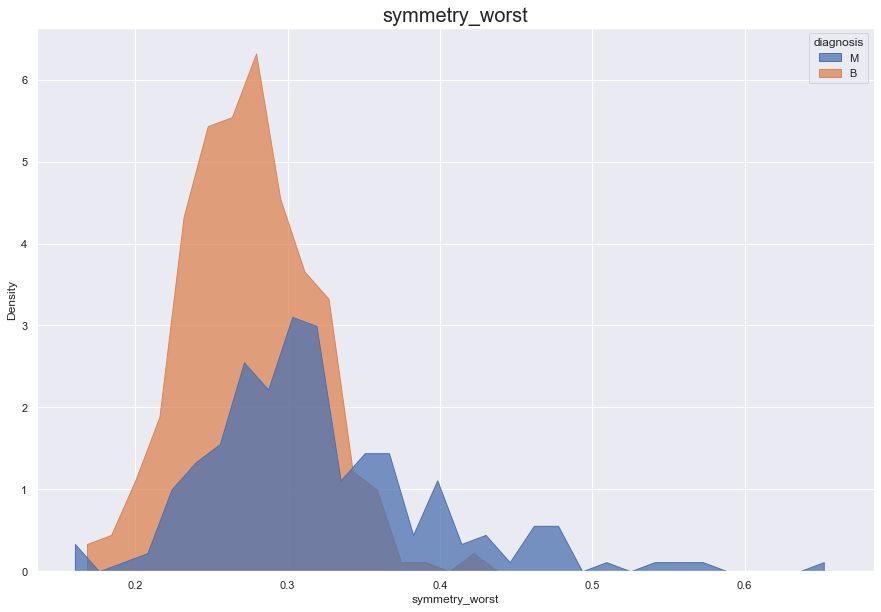

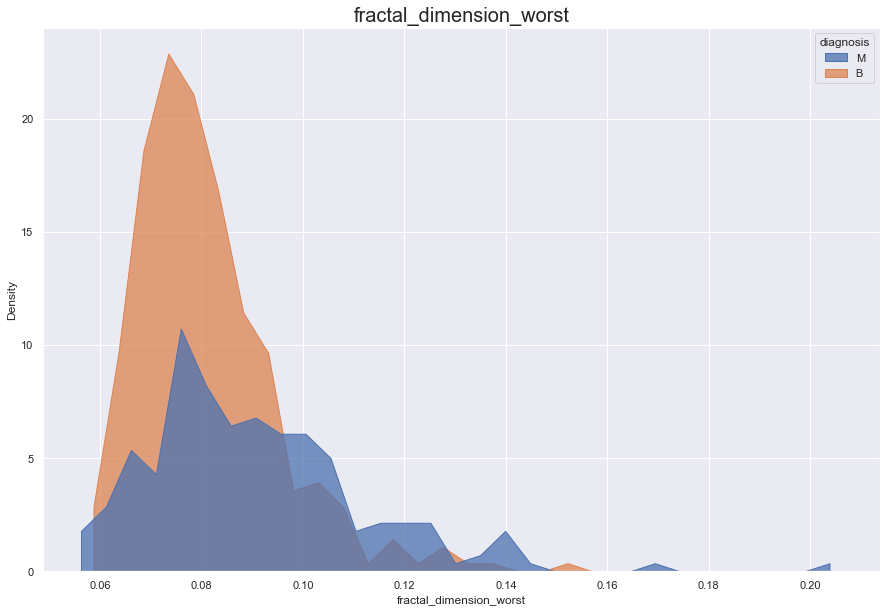

In [28]:
for variables in df.select_dtypes(exclude = 'object').columns:
    make_dist_plot(x = variables,
                   hue = 'diagnosis',
                   data = df)

## Redução de dimensão para visualizar dados

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

In [17]:
X = df.drop('diagnosis', axis = 1)
y = [1 if value == 'M' else 0 for value in df['diagnosis']]

In [32]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(569, 2)

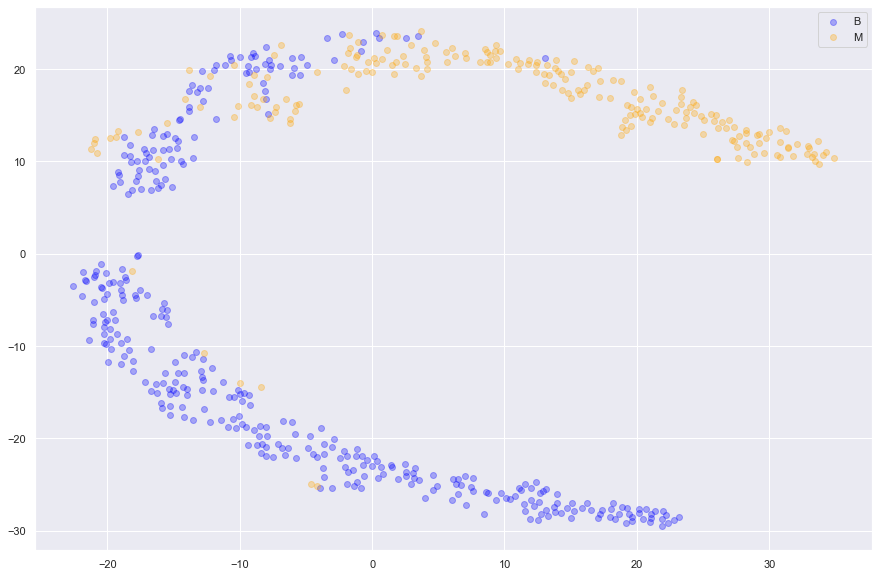

In [33]:
xs = X_embedded[:,0]
ys = X_embedded[:,1]
group = np.array(df['diagnosis'])
cdict = {'M': 'orange', 'B': 'blue'}


fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(xs[ix], ys[ix], c = cdict[g], label = g, alpha = 0.3)
ax.legend()
plt.show()

# Modelagem: LDA e QDA

![lda_qda](../imgs/lda-qda.png)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

ypred = lda.predict(X_test)
target_names = ['M', 'B']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           M       0.97      0.96      0.96        71
           B       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Cross Validation

![kfold](../imgs/kfold.png)

In [48]:
cv = KFold(n_splits=10, random_state=1, shuffle = True)

# define grid
grid = dict()
grid['solver'] = ['lsqr', 'eigen']
# grid['priors'] = [np.array([0.2, 0.8]), np.array([0.5, 0.5]) , np.array([0.8, 0.2])]

lda = LinearDiscriminantAnalysis()
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results_lda = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results_lda.best_score_)
print('Config: %s' % results_lda.best_params_)

Mean Accuracy: 0.958
Config: {'solver': 'lsqr'}


In [49]:
y_pred = results_lda.predict(X_test)

In [50]:
target_names = ['M', 'B']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           M       0.95      0.99      0.97        71
           B       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
cv = KFold(n_splits=10, random_state=1, shuffle = True)

# define grid
grid = dict()
grid['reg_param'] = np.arange(0, 10, 0.5)
grid['priors'] = [np.array([0.2, 0.8]), np.array([0.5, 0.5]) , np.array([0.8, 0.2])]

qda = QuadraticDiscriminantAnalysis()
# define search
search = GridSearchCV(qda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results_qda = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results_qda.best_score_)
print('Config: %s' % results_qda.best_params_)

Mean Accuracy: 0.958
Config: {'priors': array([0.8, 0.2]), 'reg_param': 0.0}


In [41]:
y_pred = results_qda.predict(X_test)

In [42]:
target_names = ['M', 'B']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           M       0.97      0.96      0.96        71
           B       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



QDA: ROC AUC=0.985
LDA: ROC AUC=0.992
No Skill: ROC AUC=0.500


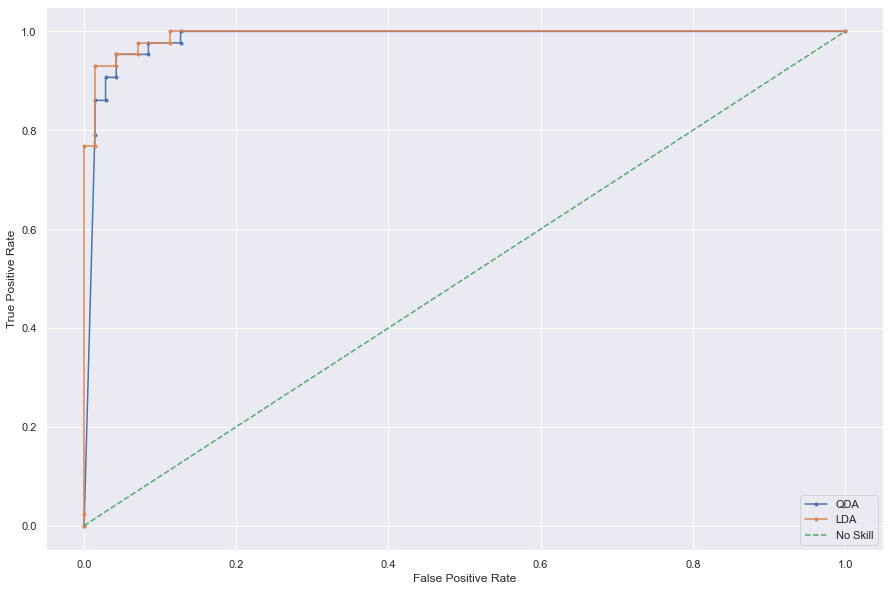

In [43]:
make_roc_curve(X_test, y_test, list_of_model_objects= [results_qda, results_lda], list_of_model_names=["QDA", "LDA"])

# Referências

[1] van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data

    Using t-SNE. Journal of Machine Learning Research 9:2579-2605, 2008.
[2] van der Maaten, L.J.P. t-Distributed Stochastic Neighbor Embedding

    https://lvdmaaten.github.io/tsne/
